In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
fsize = 12
font = {'size':fsize}
mpl.rc('font', **font)
mpl.rc('lines', linewidth=2)
mpl.rc('figure', figsize=[4*4./3.,4.])
mpl.rc('figure', facecolor='w')

## lat-level plots

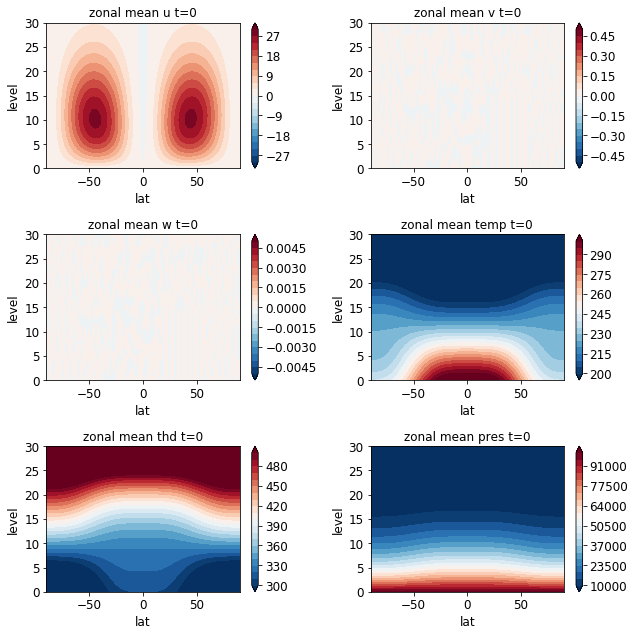

In [3]:
f = '/central/groups/esm/jiahe/gcm_TestCase/gcm_BW-dry/netcdf/BaroclinicWave_AtmosGCMDefault_2020-12-02T21.59.55.467.nc'
ds = xr.open_dataset(f)
lat = ds.coords['lat']
lon = ds.coords['long']
level = ds.coords['level']/1.e3 # km
time = ds.coords['time']
var_names = ['u','v','w','temp','thd','pres']
nvar = np.size(var_names)
tidx = 0
nrow = 3
ncol = 2
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=[4.5*(ncol),3.*nrow])
cmin = [-30,-0.5,-0.005,200,300,10000]
cmax = [30,0.5,0.005,300,500,100000]
cmap = plt.cm.RdBu_r

for vari in range(nvar):
    var_name = var_names[vari]
    clev = np.linspace(cmin[vari],cmax[vari],21)   
    da = ds.data_vars[var_name]
    da_zm = da.isel(time=tidx).mean('long')
    title = 'zonal mean '+var_name+' t='+str(tidx)
    ax = axes.flat[vari]
    h = ax.contourf(lat,level,da_zm,clev,cmap=cmap,extend='both')
    cb = plt.colorbar(h, ax=ax)
    ax.set_title(title,fontsize=fsize)
    ax.set_xlabel('lat')
    ax.set_ylabel('level')
ds.close()
    
plt.tight_layout()

## lon-lat plots

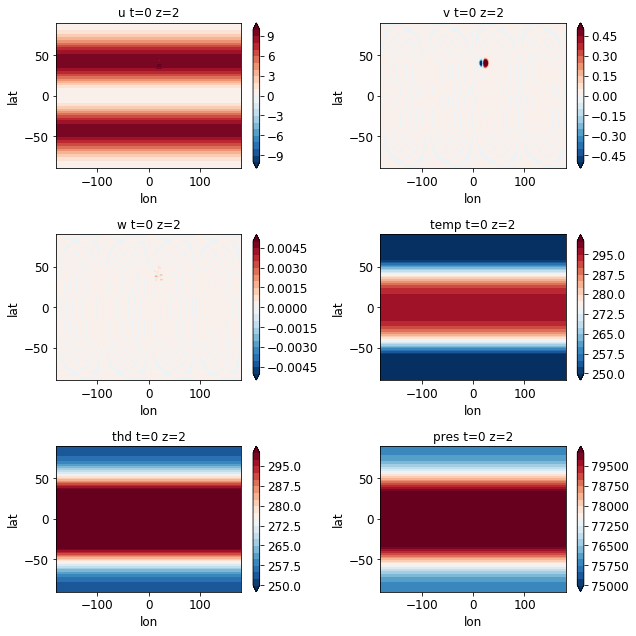

In [4]:
f = '/central/groups/esm/jiahe/gcm_TestCase/gcm_BW-dry/netcdf/BaroclinicWave_AtmosGCMDefault_2020-12-02T21.59.55.467.nc'
ds = xr.open_dataset(f)
lat = ds.coords['lat']
lon = ds.coords['long']
level = ds.coords['level']/1.e3 # km
time = ds.coords['time']
var_names = ['u','v','w','temp','thd','pres']
nvar = np.size(var_names)
tidx = 0
zidx = 2
nrow = 3
ncol = 2
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=[4.5*(ncol),3.*nrow])
cmin = [-10,-0.5,-0.005,250,250,75000]
cmax = [10,0.5,0.005,300,300,80000]
cmap = plt.cm.RdBu_r

for vari in range(nvar):
    var_name = var_names[vari]
    clev = np.linspace(cmin[vari],cmax[vari],21)   
    da = ds.data_vars[var_name]
    da_slice = da.isel(time=tidx).isel(level=zidx)
    title = var_name+' t='+str(tidx)+' z='+str(zidx)
    ax = axes.flat[vari]
    h = ax.contourf(lon,lat,da_slice,clev,cmap=cmap,extend='both')
    cb = plt.colorbar(h, ax=ax)
    ax.set_title(title,fontsize=fsize)
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
ds.close()
    
plt.tight_layout()